In [2]:
#loading the datasets
import pandas as pd
FeedForward_Data_ellipse_df=pd.read_csv('FeedForward_Data_ellipse(1).csv', header=None)
XOR_df=pd.read_csv('XOR(2).csv')
FeedForward_Data_hexa_df=pd.read_csv('FeedForward_Data_hexa(1).csv',header=None)

FeedForward_Data_ellipse_df.columns=['Input A', 'Input B', 'output']
FeedForward_Data_hexa_df.columns=['Input A', 'Input B', 'output']

## 1) Classification of XOR data (15 points)
At first sight, it may seem as if separating the XOR data is a simple task.  However, due to the fact that the data is not linearly separable and that fitting the data requires non-trivial learning, the XOR problem has been a case study of interest on many topics related to training of feedforward networks.  In the 1960s, Minsky and Papert’s observations that perceptrons (neural network ancestors) were unable to fit the XOR data contributed to the rise of the first AI winter.  XOR data makes for such an interesting case study that papers describing learning properties of networks trained on it are still being published to this day.

Create arrays containing the input data and the corresponding output labels for the XOR operator.  Recall that XOR takes as input two binary variables, and outputs a 0/1 if they have the same/different value.  Your XOR data should look like the following table:


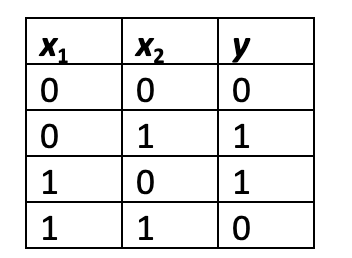

In other words, the XOR training includes four, two-dimensional data samples with labels.  Create and train a network with at least three hidden layers that separates the XOR data, that is, a network that gets 100% performance on the four training samples above.  Monitor the accuracy on the training set as the training progresses.


### a) Plot the decision boundaries of the earliest network in the training process that achieves 100% accuracy by plotting the network outputs in a densely sampled region around [-0.5,1.5] × [-0.5,1.5]. (5 points)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.694210410118103
Training accuracy is  0.5
Epoch  10 Loss  0.6933611631393433
Training accuracy is  0.5
Epoch  20 Loss  0.692391574382782
Training accuracy is  0.5
Epoch  30 Loss  0.6916065216064453
Training accuracy is  0.5
Epoch  40 Loss  0.6908672451972961
Training accuracy is  0.75
Epoch  50 Loss  0.6900669932365417
Training accuracy is  0.5
Epoch  60 Loss  0.6892011761665344
Training accuracy is  0.75
Epoch  70 Loss  0.6881605386734009
Training accuracy is  0.75
Epoch  80 Loss  0.6869800686836243
Training accuracy is  0.75
Epoch  90 Loss  0.6855789422988892
Training accuracy is  0.75
Epoch  100 Loss  0.6841433048248291
Training accuracy is  0.75
Epoch  110 Loss  0.6822256445884705
Training accuracy is  0.75
Epoch  120 Loss  0.6797618269920349
Training accuracy is  0.75
Epoch  130 Loss  0.6765573024749756
Training accuracy is  0.75
Epoch  140 Loss  0.6720657348632812
Training accuracy is  0.75
Epoch  150 Loss  0.6663628816604614
Training accuracy is  0.75
Epoch  160

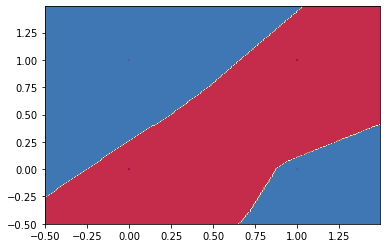

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 31 2021

@author: Gurneet Chhabra
"""
#%% dependencies and definitions
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

torch.manual_seed(1)

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

#%% read data

###
data = XOR_df# UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000 #10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        if accuracy == 1:
            break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)

#%% if need to train further

# for epoch in range(nepochs):
#     # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
#     optimizer.zero_grad()
#     net_out = net(data)
#     loss = criterion(net_out, target)
#     loss.backward()
#     optimizer.step()
#     if epoch % 100 == 0:
#         print('Epoch ', epoch, 'Loss ', loss.item())


#%%  plot outputs
plot_decision_boundary(net, X, y, 'Results0.0001.pdf')
#plot_decision_boundary(net, X[correctidx,:], y[correctidx], 'Correct.pdf')
#plot_decision_boundary(net, X[~correctidx,:], y[~correctidx], 'Inorrect.pdf')

#%% save model



### b) Plot the decision boundaries of a network after the loss falls below 	1×10-4. (5 points)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.694210410118103
Training accuracy is  0.5
Epoch  10 Loss  0.6933611631393433
Training accuracy is  0.5
Epoch  20 Loss  0.692391574382782
Training accuracy is  0.5
Epoch  30 Loss  0.6916065216064453
Training accuracy is  0.5
Epoch  40 Loss  0.6908672451972961
Training accuracy is  0.75
Epoch  50 Loss  0.6900669932365417
Training accuracy is  0.5
Epoch  60 Loss  0.6892011761665344
Training accuracy is  0.75
Epoch  70 Loss  0.6881605386734009
Training accuracy is  0.75
Epoch  80 Loss  0.6869800686836243
Training accuracy is  0.75
Epoch  90 Loss  0.6855789422988892
Training accuracy is  0.75
Epoch  100 Loss  0.6841433048248291
Training accuracy is  0.75
Epoch  110 Loss  0.6822256445884705
Training accuracy is  0.75
Epoch  120 Loss  0.6797618269920349
Training accuracy is  0.75
Epoch  130 Loss  0.6765573024749756
Training accuracy is  0.75
Epoch  140 Loss  0.6720657348632812
Training accuracy is  0.75
Epoch  150 Loss  0.6663628816604614
Training accuracy is  0.75
Epoch  160

Training accuracy is  1.0
Epoch  1300 Loss  0.0001711945078568533
Training accuracy is  1.0
Epoch  1310 Loss  0.0001691982033662498
Training accuracy is  1.0
Epoch  1320 Loss  0.00016717211110517383
Training accuracy is  1.0
Epoch  1330 Loss  0.00016523539670743048
Training accuracy is  1.0
Epoch  1340 Loss  0.00016338806017301977
Training accuracy is  1.0
Epoch  1350 Loss  0.00016148110444191843
Training accuracy is  1.0
Epoch  1360 Loss  0.00015966355567798018
Training accuracy is  1.0
Epoch  1370 Loss  0.0001578757946845144
Training accuracy is  1.0
Epoch  1380 Loss  0.00015611783601343632
Training accuracy is  1.0
Epoch  1390 Loss  0.00015441945288330317
Training accuracy is  1.0
Epoch  1400 Loss  0.00015266146510839462
Training accuracy is  1.0
Epoch  1410 Loss  0.00015105247439350933
Training accuracy is  1.0
Epoch  1420 Loss  0.0001494732714490965
Training accuracy is  1.0
Epoch  1430 Loss  0.00014783446385990828
Training accuracy is  1.0
Epoch  1440 Loss  0.00014628504868596792

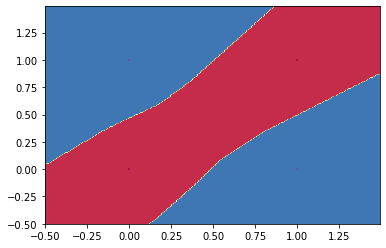

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 31 2021

@author: Gurneet Chhabra
"""
#%% dependencies and definitions
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

torch.manual_seed(1)

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

#%% read data

###
data = XOR_df# UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000 #10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())

        if loss.item() < (10**-4):
          break 
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #if accuracy == 1:
        #    break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)

#%% if need to train further

# for epoch in range(nepochs):
#     # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
#     optimizer.zero_grad()
#     net_out = net(data)
#     loss = criterion(net_out, target)
#     loss.backward()
#     optimizer.step()
#     if epoch % 100 == 0:
#         print('Epoch ', epoch, 'Loss ', loss.item())


#%%  plot outputs
plot_decision_boundary(net, X, y, 'Results0.0001.pdf')
#plot_decision_boundary(net, X[correctidx,:], y[correctidx], 'Correct.pdf')
#plot_decision_boundary(net, X[~correctidx,:], y[~correctidx], 'Inorrect.pdf')

#%% save model



Thus we stop after epoch 1870, as the loss falls below 1x10^-4. Above is the decision boundary.

### c) Gradually decrease the capacity of the network above.  Find the smallest network that can still separate the data, i.e., find the least number of hidden layers and neurons that produces an accuracy of 1 on the training set? (5 points) [A portion of the total points is allocated to your rank amongst your peers in achieving the smallest network]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6906426548957825
Training accuracy is  0.75
Epoch  1000 Loss  0.008268105797469616
Training accuracy is  1.0
Epoch  2000 Loss  0.0029847114346921444
Training accuracy is  1.0
Epoch  3000 Loss  0.001725940266624093
Training accuracy is  1.0
Epoch  4000 Loss  0.0011869403533637524
Training accuracy is  1.0
Epoch  5000 Loss  0.0008935100631788373
Training accuracy is  1.0
Epoch  6000 Loss  0.0007110246224328876
Training accuracy is  1.0
Epoch  7000 Loss  0.0005873800255358219
Training accuracy is  1.0
Epoch  8000 Loss  0.000498566310852766
Training accuracy is  1.0
Epoch  9000 Loss  0.0004318456631153822
Training accuracy is  1.0
Training accuracy is  1.0


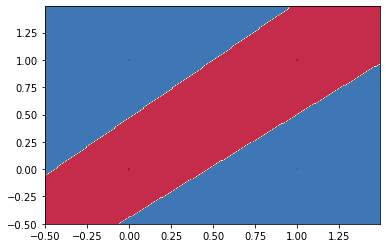

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 31 2021

@author: Gurneet Chhabra
"""
#%% dependencies and definitions
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

torch.manual_seed(1)


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc6 = nn.Linear(3,2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

#%% read data

###
data = XOR_df# UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 10000 #10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 1000 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())

        if loss.item() < (10**-4):
          break 
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #if accuracy == 1:
        #    break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)

#%% if need to train further

# for epoch in range(nepochs):
#     # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
#     optimizer.zero_grad()
#     net_out = net(data)
#     loss = criterion(net_out, target)
#     loss.backward()
#     optimizer.step()
#     if epoch % 100 == 0:
#         print('Epoch ', epoch, 'Loss ', loss.item())


#%%  plot outputs
plot_decision_boundary(net, X, y, 'Results0.0001.pdf')
#plot_decision_boundary(net, X[correctidx,:], y[correctidx], 'Correct.pdf')
#plot_decision_boundary(net, X[~correctidx,:], y[~correctidx], 'Inorrect.pdf')

#%% save model



On gradually decreasing the network size, we were able to reduce it to just 1 hidden layer of 3 neurons. 

## 2) Classification of Separable, Synthetic data (15 +10 points)
In this section, you will attempt to design a network that is able to classify synthetically created data that is still separable, that is, where no overlap exists between the classes in the native feature space.  In this case, however, the tolerances (i.e., the smallest separation between samples in different classes) are much tighter than those seen in the XOR case.


### a) File Feedforward_Data_ellipse.csv contains 13312 two-dimensional data points (feature values located in columns 1 and 2) and their respective binary label (labels located in column 3).  Create and train a network that separates the data.  Report your best loss and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around [-1.0,1.0] × [-1.0,1.0].  Report the number of hidden layers, type of activation function and number of neurons per layer used.  (15 points). [A portion of the total points is allocated based on your rank amongst your peers in achieving the best loss and accuracy values]


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6956959962844849
Training accuracy is  0.6081730769230769
Epoch  5000 Loss  0.17361363768577576
Training accuracy is  0.9070012019230769
Epoch  10000 Loss  0.11709929257631302
Training accuracy is  0.9526742788461539
Epoch  15000 Loss  0.06336573511362076
Training accuracy is  0.9770132211538461
Epoch  20000 Loss  0.05456221476197243
Training accuracy is  0.9799429086538461
Epoch  25000 Loss  0.04936273396015167
Training accuracy is  0.9821965144230769
Epoch  30000 Loss  0.046060144901275635
Training accuracy is  0.9832481971153846
Epoch  35000 Loss  0.04442921653389931
Training accuracy is  0.9840745192307693
Epoch  40000 Loss  0.04353059083223343
Training accuracy is  0.9846003605769231
Epoch  45000 Loss  0.04301644116640091
Training accuracy is  0.9851262019230769
Epoch  50000 Loss  0.04287388548254967
Training accuracy is  0.9848257211538461
Training accuracy is  0.9848257211538461


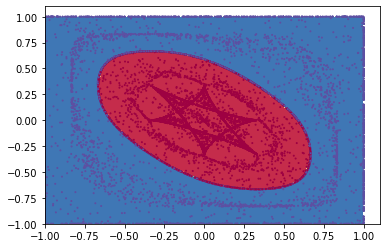

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 31 2021

@author: Gurneet Chhabra
"""
#%% dependencies and definitions
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

torch.manual_seed(3)

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 80)
        self.fc4 = nn.Linear(80, 40)
        self.fc5 = nn.Linear(40, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

#%% read data

###
data = FeedForward_Data_ellipse_df# UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

#%% train
net = Net()
# create a stochastic gradient descent optimizer
learning_rate = .01
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 51000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
   #adjust learning rate if desired
    if epoch % 3000 == 0 and epoch <= 51000:
       for g in optimizer.param_groups:
           g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 5000 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #if accuracy == 1:
        #    break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)


plot_decision_boundary(net, X, y, 'Results0.0001.pdf')



Thus we are using 5 hidden layers with ReLu activation function. Our total neurons in the hidden layer are 20,40,80,40,20.

The best loss is 0.04287 and best accuracy is 98.48%.

Also we are reducing the learning rate by half after every 3000 epochs starting with learning rate of 0.01. We ran it for a total of 51000 epochs.

### b) File Feedforward_Data_hexa.csv contains 13312 two-dimensional data points (feature values located in columns 1 and 2) and their respective binary label (labels located in column 3).  Create and train a network that separates the data.  Report your best loss and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around [-1.0,1.0] × [-1.0,1.0].  Report the number of hidden layers, type of activation function and number of neurons per layer used.   (10 points) [A portion of the total points is allocated based on your rank amongst your peers in achieving the best loss and accuracy values]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6768875122070312
Training accuracy is  0.9405799278846154
Epoch  10000 Loss  0.007859659381210804
Training accuracy is  0.9970703125
Epoch  20000 Loss  0.005133960861712694
Training accuracy is  0.9978966346153846
Training accuracy is  0.9979717548076923


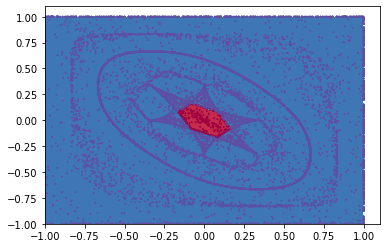

In [59]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 31 2021

@author: Gurneet Chhabra
"""
#%% dependencies and definitions
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

torch.manual_seed(3)

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 80)
        self.fc4 = nn.Linear(80, 40)
        self.fc5 = nn.Linear(40, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

#%% read data

###
data = FeedForward_Data_hexa_df # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#plot_data(X,y,'data.pdf')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

#%% train
net = Net()
# create a stochastic gradient descent optimizer
learning_rate = .01
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 24000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
   #adjust learning rate if desired
    if epoch % 3000 == 0 and epoch <= 24000:
       for g in optimizer.param_groups:
           g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10000 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #if accuracy == 1:
        #    break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)


plot_decision_boundary(net, X, y, 'Results0.0001.pdf')



Thus we are using 5 hidden layers with ReLu activation function. Our total neurons in the hidden layer are 20,40,80,40,20.

The best loss is 0.00500 and best accuracy is 99.79%

Also we are reducing the learning rate by half after every 3000 epochs, starting with a learning rate of 0.01 . We ran it for a total of 24000 epochs.